# Calculating covarince matrix

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4 as n
%matplotlib inline

In [2]:
# reading test


path = "./files/"
filenames = ["specific_humidity_Europe.nc", "relative_humidity_Europe.nc", "surface_pressure_Europa.nc",  
             "temperature_2m_Europa.nc", "total_cloud_cover_Europa.nc"]


cloud = n.Dataset(path + filenames[-1], "r")
relative = n.Dataset(path + filenames[1], "r")
specific = n.Dataset(path + filenames[0], "r")
pressure = n.Dataset(path + filenames[2], "r")
temperature = n.Dataset(path + filenames[3], "r")

#print(cloud.variables)

tcc = cloud.variables["tcc"]
rel = relative.variables["r"]
level = relative.variables["level"]
spe = specific.variables["q"]
surf_pre = pressure.variables["sp"]
temp = temperature.variables["t2m"]

""" EQUAL"""
time = cloud.variables["time"]
lat = cloud.variables["latitude"]
long = cloud.variables["longitude"]

In [3]:
relative.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (58,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (46,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('level', <class 'netCDF4._netCDF4.Variable'>
              int32 level(level)
                  units: millibars
                  long_name: pressure_level
              unlimited dimensions: 
              current shape = (6,)
              filling on, default _FillValue of -2147483647 used),
             ('time', <clas

In [4]:
#temperature.variables
tcc[0].data[:].flatten()

array([ 0.6830757 ,  0.77213007,  0.89898219, ...,  0.0826759 ,
        0.0291151 ,  0.02530023])

# Covariance coefficients for one 

In [5]:
test = np.array([tcc[0].data[:].flatten(), rel[0][0].data[:].flatten(), spe[0][0].data[:].flatten(), 
                 temp[0].data[:].flatten(), surf_pre[0].data[:].flatten()])

matrix = np.zeros((5, len(tcc[0].data[:].flatten())))

matrix[:][0] = tcc[0].data[:].flatten()
matrix[:][1] = rel[0][0].data[:].flatten()
matrix[:][2] = spe[0][0].data[:].flatten()
matrix[:][3] = temp[0].data[:].flatten()
matrix[:][4] = surf_pre[0].data[:].flatten()

np.transpose(test)

array([[  6.83075702e-01,   7.21058225e+01,   5.40875612e-04,
          2.54357236e+02,   1.01478544e+05],
       [  7.72130072e-01,   7.89372604e+01,   5.71669698e-04,
          2.54372122e+02,   1.01492653e+05],
       [  8.98982192e-01,   8.69577145e+01,   6.00673429e-04,
          2.54287269e+02,   1.01478104e+05],
       ..., 
       [  8.26759037e-02,   8.53023570e+01,   5.18863409e-03,
          2.78768121e+02,   9.34058924e+04],
       [  2.91151023e-02,   8.43573208e+01,   5.26884194e-03,
          2.78949736e+02,   9.43740816e+04],
       [  2.53002304e-02,   8.24826903e+01,   5.28961004e-03,
          2.79941177e+02,   9.58184294e+04]])

In [6]:
coeff = np.corrcoef(test)

In [7]:
coeff
# cloud cover, relative humidity, specific humidity, temperatur, pressure

array([[ 1.        ,  0.45540035, -0.30936617, -0.34298874,  0.04190591],
       [ 0.45540035,  1.        ,  0.04234962, -0.29509528, -0.206812  ],
       [-0.30936617,  0.04234962,  1.        ,  0.88093187, -0.09445278],
       [-0.34298874, -0.29509528,  0.88093187,  1.        , -0.02973587],
       [ 0.04190591, -0.206812  , -0.09445278, -0.02973587,  1.        ]])

In [8]:
# Correlation for one coordinate

In [20]:
x=y=0
p_level = 0 #1000hPa
tres = 10000
test = np.array([tcc[:tres][x][y].data[:], rel[:tres][p_level][x][y].data[:], spe[:tres][p_level][x][y].data[:], 
                 temp[:tres][x][y].data[:], surf_pre[:tres][x][y].data[:]])

In [ ]:
# Show that you get same covarinace for all x,y ind

# Can check if the cloud cover is more dependant on another pressure levels.

In [ ]:
np.corrcoef(test)

In [12]:
timestep = 0
lat_step = 0
long_step = 0


t0 = tcc[0][:][:]
#t0.flatten()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

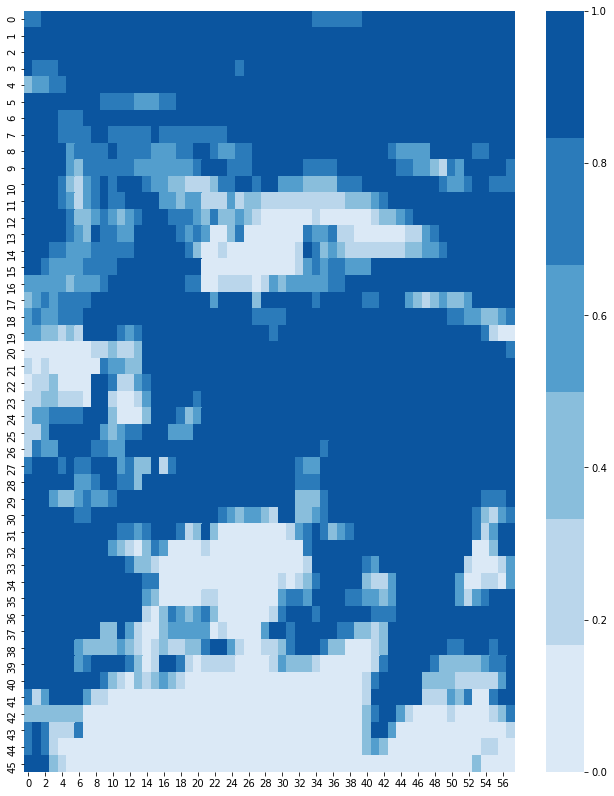

In [14]:
plt.figure(figsize = (11,14))
ax = sns.heatmap(t0,cmap = sns.color_palette("Blues")) # annot=True, displays the numbers. We should have a finer resolution.
plt.show()

In [15]:
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
#from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

data = tcc[0][:][:]
# tcc(time, latitude, longitude)
data.shape
#latcorners = lat[:]
#loncorners = -long['lon'][:]
#lon_0 = -long.getValue()
#lat_0 = lat.getValue()
plt.figure(figsize = (12,8))
plt.plot(data)
plt.show()

KeyError: 'PROJ_LIB'

In [ ]:
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)


# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('tcc')
# add title
plt.title("testing")
plt.show()